In [17]:
import numpy as np
import pandas as pd
import cufflinks as cf
cf.set_config_file(offline=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Data Preview

In [18]:
df = pd.read_csv('./data.csv', index_col=0)

In [19]:
print('Columns:\n{}'.format(df.columns.values))
print('Data Types:\n{}'.format(df.dtypes))
print('Shape:\n{}'.format(df.shape))

Columns:
['name' 'desc' 'goal' 'keywords' 'disable_communication' 'country'
 'currency' 'deadline' 'state_changed_at' 'created_at' 'launched_at'
 'backers_count' 'final_status']
Data Types:
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
backers_count              int64
final_status               int64
dtype: object
Shape:
(108129, 13)


In [20]:
# Drop 'created_at' and 'currency' columns for dimension reduction and also importance
# currency column is proxy for country anyways
df = df.drop(['created_at','currency'], axis=1)
df.head()

,name,desc,goal,keywords,disable_communication,country,deadline,state_changed_at,launched_at,backers_count,final_status
project_id,,,,,,,,,,,
kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,1241333999,1241334017,1240602723,3,1
kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,1242429000,1242432018,1240975592,2,0
kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,1243027560,1243027818,1242164398,0,0
kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,1243555740,1243556121,1240966730,18,1
kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,1243769880,1243770317,1241180541,1,0


## Feature Engineering

In [21]:
unix_time_columns = ['deadline','state_changed_at','launched_at']
for col in unix_time_columns:
    col_name = col+'_dt'
    df[col_name] = pd.to_datetime(df[col],unit='s')

In [22]:
# feature engineering 1 (duration)
# leave in unix time because only care about the difference
df['expected_duration'] = df['deadline'] - df['launched_at']
df['actual_duration']   = df['state_changed_at'] - df['launched_at']

In [23]:
# feature engineering 2 (launch times)
df['launch_year']  = df['launched_at_dt'].dt.year
df['launch_month'] = df['launched_at_dt'].dt.month
df['launch_day']   = df['launched_at_dt'].dt.day
df['launch_hour']  = df['launched_at_dt'].dt.hour

In [24]:
# feature engineering 3 (deadline times)
df['deadline_year']  = df['deadline_dt'].dt.year
df['deadline_month'] = df['deadline_dt'].dt.month
df['deadline_day']   = df['deadline_dt'].dt.day

In [25]:
for col in unix_time_columns:
    df = df.drop(col, axis=1)
    df = df.drop(col+'_dt', axis=1)

In [26]:
print('Columns:\n{}'.format(df.columns.values))
print('Data Types:\n{}'.format(df.dtypes))
print('Shape:\n{}'.format(df.shape))
df.head()

Columns:
['name' 'desc' 'goal' 'keywords' 'disable_communication' 'country'
 'backers_count' 'final_status' 'expected_duration' 'actual_duration'
 'launch_year' 'launch_month' 'launch_day' 'launch_hour' 'deadline_year'
 'deadline_month' 'deadline_day']
Data Types:
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
backers_count              int64
final_status               int64
expected_duration          int64
actual_duration            int64
launch_year                int64
launch_month               int64
launch_day                 int64
launch_hour                int64
deadline_year              int64
deadline_month             int64
deadline_day               int64
dtype: object
Shape:
(108129, 17)


,name,desc,goal,keywords,disable_communication,country,backers_count,final_status,expected_duration,actual_duration,launch_year,launch_month,launch_day,launch_hour,deadline_year,deadline_month,deadline_day
project_id,,,,,,,,,,,,,,,,,
kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,3,1,731276,731294,2009,4,24,19,2009,5,3
kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,2,0,1453408,1456426,2009,4,29,3,2009,5,15
kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,0,0,863162,863420,2009,5,12,21,2009,5,22
kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,18,1,2589010,2589391,2009,4,29,0,2009,5,29
kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,1,0,2589339,2589776,2009,5,1,12,2009,5,31


## Label Encoding

In [27]:
dummy_cols = ['country',
              'launch_hour','launch_day','launch_month','launch_year',
              'deadline_day','deadline_month','deadline_year']
for col in dummy_cols:
    df = pd.merge(df, pd.get_dummies(df[col], prefix=col), left_index=True, right_index=True)
    df = df.drop(col, axis=1)

In [28]:
print('Columns:\n{}'.format(df.columns.values))
print('Data Types:\n{}'.format(df.dtypes))
print('Shape:\n{}'.format(df.shape))

Columns:
['name' 'desc' 'goal' 'keywords' 'disable_communication' 'backers_count'
 'final_status' 'expected_duration' 'actual_duration' 'country_AU'
 'country_CA' 'country_DE' 'country_DK' 'country_GB' 'country_IE'
 'country_NL' 'country_NO' 'country_NZ' 'country_SE' 'country_US'
 'launch_hour_0' 'launch_hour_1' 'launch_hour_2' 'launch_hour_3'
 'launch_hour_4' 'launch_hour_5' 'launch_hour_6' 'launch_hour_7'
 'launch_hour_8' 'launch_hour_9' 'launch_hour_10' 'launch_hour_11'
 'launch_hour_12' 'launch_hour_13' 'launch_hour_14' 'launch_hour_15'
 'launch_hour_16' 'launch_hour_17' 'launch_hour_18' 'launch_hour_19'
 'launch_hour_20' 'launch_hour_21' 'launch_hour_22' 'launch_hour_23'
 'launch_day_1' 'launch_day_2' 'launch_day_3' 'launch_day_4' 'launch_day_5'
 'launch_day_6' 'launch_day_7' 'launch_day_8' 'launch_day_9'
 'launch_day_10' 'launch_day_11' 'launch_day_12' 'launch_day_13'
 'launch_day_14' 'launch_day_15' 'launch_day_16' 'launch_day_17'
 'launch_day_18' 'launch_day_19' 'launch_day_20'

#### Not Dealing With Text for Milestone 1 - Idea: Cluster Projects Based on name, desc, keywords and use cluster as another feature

In [29]:
# remove text fields for now
text_cols = ['name','desc','keywords']
df = df.drop(text_cols, axis=1)

# Models

In [30]:
# split into train and test
from sklearn.model_selection import train_test_split

X = df.drop('final_status',axis=1)
y = df['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

## Decision Tree

In [31]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
param_grid = {'max_depth': np.arange(5, 10),
              'criterion': ['gini','entropy'],
              'max_features': ['auto','log2']}

tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid)

# takes a minute
tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
dt = tree.best_estimator_
labels_dt = dt.predict(X_test)

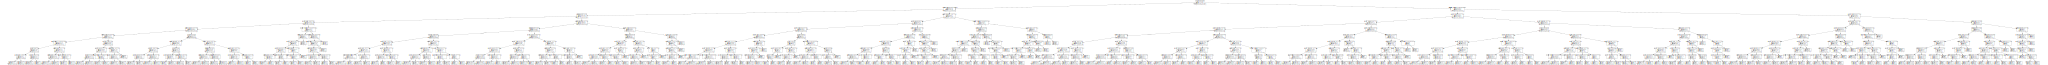

In [34]:
# this cell might throw some errors
# if it does, don't worry about it cuz you dont need to worry about DTs
# so just comment it out

features = list(df.columns.values)
features.remove('final_status')

export_graphviz(dt, out_file='dt.dot', feature_names=features)
with open('dt.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [39]:
tree.best_params_
# This means that the best model is ...

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
labels_lr = lr.predict(X_test)

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(10, 20)}

rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid)

# takes a minute
rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
rf = rf.best_estimator_

In [49]:
labels_rf = rf.predict(X_test)

## Random Forest (Entropy)

In [50]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(10, 20)}

rf_entropy = GridSearchCV(RandomForestClassifier(random_state=42, criterion = 'entropy'), param_grid)

# takes a minute
rf_entropy.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
rf_entropy = rf_entropy.best_estimator_

In [52]:
labels_rf_entropy = rf_entropy.predict(X_test)

## Evaluation

In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate_model(predicted, actual):
    
    # Table-Type Plotting
    print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    print('Accuracy: {}'.format(metrics.accuracy_score(predicted, actual)))
    print('Precision: {}'.format(metrics.precision_score(predicted, actual)))
    print('Recall: {}'.format(metrics.recall_score(predicted, actual)))
    print('F-1: {}'.format(metrics.f1_score(predicted, actual)))
    print('Classification Report:\n{}'.format(metrics.classification_report(predicted, actual)))
    print('AUC: {}'.format(metrics.roc_auc_score(predicted, actual)))    
    print('Zero-One Loss: {}'.format(metrics.zero_one_loss(predicted, actual)))
    
    ind = ['acc','prec','recall','f1','auc','zero-one']
    
    # ROC Curve Plotting
    fpr, tpr, thresh = metrics.roc_curve(actual, predicted, )
    roc_auc = metrics.auc(fpr, tpr)    
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

Confusion Matrix:
[[21445  5784]
 [ 2785  5669]]
Accuracy: 0.7598576352885127
Precision: 0.494979481358596
Recall: 0.6705701443103856
F-1: 0.5695484000602803
Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.79      0.83     27229
          1       0.49      0.67      0.57      8454

avg / total       0.79      0.76      0.77     35683

AUC: 0.7290747816560925
Zero-One Loss: 0.2401423647114873


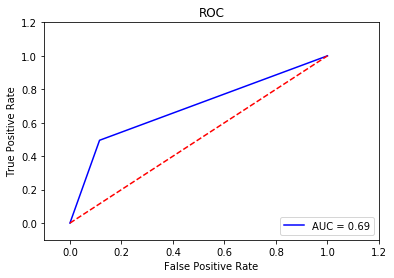

In [54]:
evaluate_model(labels_dt, y_test)

Confusion Matrix:
[[23848  7756]
 [  382  3697]]
Accuracy: 0.7719362161253258
Precision: 0.32279752030035797
Recall: 0.9063495954890904
F-1: 0.47604944630440377
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.75      0.85     31604
          1       0.32      0.91      0.48      4079

avg / total       0.91      0.77      0.81     35683

AUC: 0.8304688111605686
Zero-One Loss: 0.2280637838746742


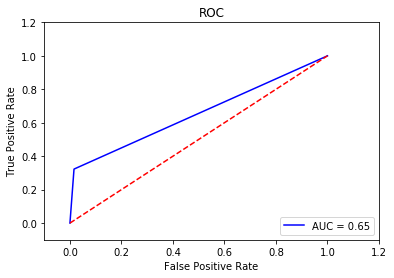

In [55]:
evaluate_model(labels_lr, y_test)

Confusion Matrix:
[[21399  2383]
 [ 2831  9070]]
Accuracy: 0.853879998879018
Precision: 0.791932244826683
Recall: 0.7621208301823377
F-1: 0.7767406011818105
Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.90      0.89     23782
          1       0.79      0.76      0.78     11901

avg / total       0.85      0.85      0.85     35683

AUC: 0.8309594984315103
Zero-One Loss: 0.146120001120982


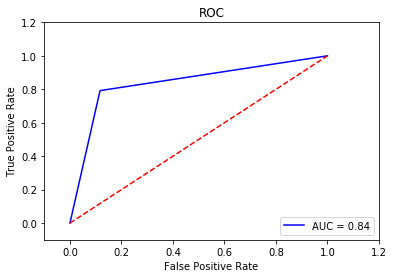

In [56]:
evaluate_model(labels_rf, y_test)

Confusion Matrix:
[[21342  2416]
 [ 2888  9037]]
Accuracy: 0.851357789423535
Precision: 0.7890509036933554
Recall: 0.7578197064989518
F-1: 0.7731200273761656
Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.90      0.89     23758
          1       0.79      0.76      0.77     11925

avg / total       0.85      0.85      0.85     35683

AUC: 0.8280638224388016
Zero-One Loss: 0.14864221057646498


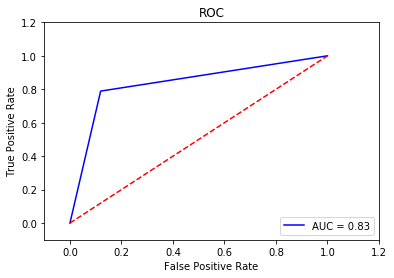

In [57]:
evaluate_model(labels_rf_entropy, y_test)